In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

In [28]:
import jenkspy
import numpy as np
from sklearn.neighbors.kde import KernelDensity

/home/calum/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [1]:
from chessvision.aruco import *
from chessvision.game import *
from chessvision.label import *

In [5]:
games = (
        Game("Bird", 0, flipped=True),
        Game("Adams", 0, flipped=True),
        Game("Adams", 1),
        Game("Adams", 2),
        Game("Adams", 3)
    )

In [6]:
save_games(games, label_fn['occupied'], [True, False])

'/tmp/chess-vision-hf7p_t1t'

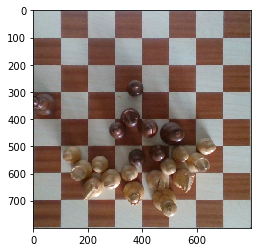

In [10]:
move = 0
moves = list(game.images)
color = cv2.cvtColor(moves[move]["color"], cv2.COLOR_BGR2RGB)
plt.imshow(board(color), interpolation='nearest')

In [9]:
corners = find_corners(game.images)
corners

array([[1442.5573  ,  102.56604 ],
       [ 583.46423 ,  101.864075],
       [1452.6666  ,  977.5987  ],
       [ 568.8668  ,  971.2807  ]], dtype=float32)

In [7]:
def board(img):
    return np.flip(get_board(img, corners, margin=0), axis=1)

depth = moves[move]["depth"]
# depth = cv2.applyColorMap(cv2.convertScaleAbs(depth, alpha=0.03), cv2.COLORMAP_JET)
plt.imshow(board(depth), interpolation='nearest')

NameError: name 'corners' is not defined

In [216]:
max(depth.flatten())

6092

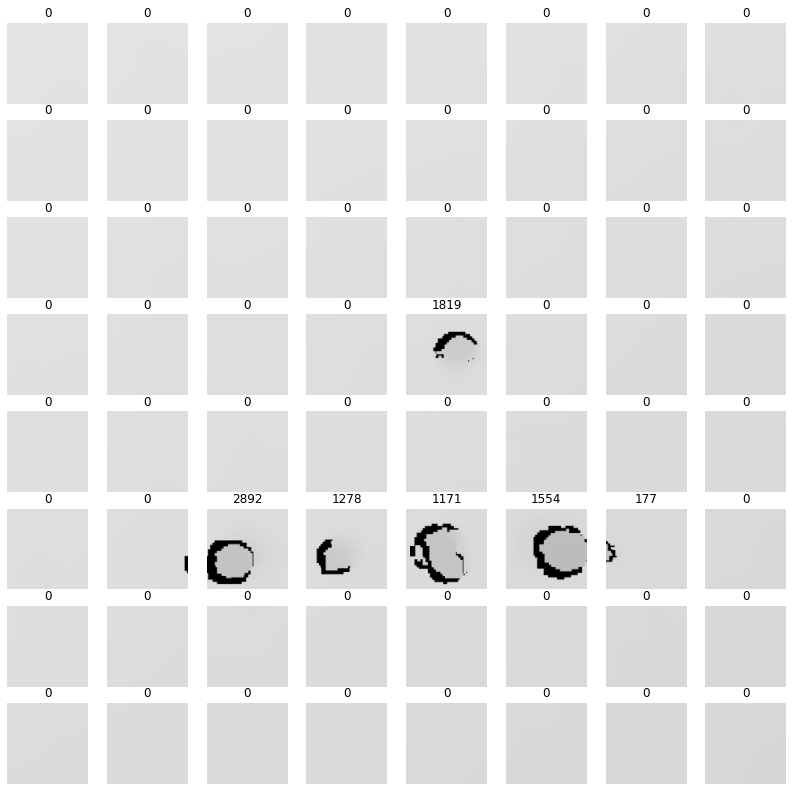

In [252]:
plt.figure(figsize=(14,14))
sums = []
for i, square in enumerate(get_squares(board(depth))):
    plt.subplot(8, 8, 64-i)
    square = square
    x = square.flatten()
    height = np.sum(x * (x < 255))
    if height:
        sums.append(height)
    plt.title(height)
    plt.imshow(square, cmap='gray', vmin=0, vmax=6000)
    plt.axis("off")

In [262]:
def heights(board, margin=20):
    for square in get_squares(board):
        square = square[margin:-margin,margin:-margin].flatten()
        if height := np.sum(square * (square < 255)):
            yield height

In [7]:
{True: 0, False: 1}

{True: 0, False: 1}

(<matplotlib.image.AxesImage at 0x7fb58cafc460>,
 array([[5335, 5335, 5335, ..., 5230, 5230, 5230],
        [5335, 5335, 5335, ..., 5230, 5230, 5230],
        [5335, 5335, 5335, ..., 5230, 5229, 5229],
        ...,
        [5142, 5142, 5142, ..., 5037, 5039, 5039],
        [5141, 5141, 5140, ..., 5037, 5039, 5039],
        [5141, 5141, 5140, ..., 5037, 5039, 5039]], dtype=uint16))

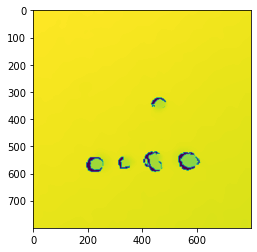

In [263]:
d = board(depth)
plt.imshow(d), d

In [264]:
sums = np.fromiter(itertools.chain.from_iterable(
    [heights(board(depth))]), np.int64
)
sums

array([ 463,  990,  970, 1429, 1819])

In [265]:
jnb = jenkspy.JenksNaturalBreaks(2)
jnb.fit(sums)
jnb.__dict__

{'nb_class': 2,
 'breaks_': [463.0, 990.0, 1819.0],
 'inner_breaks_': [990.0],
 'labels_': array([0, 0, 0, 1, 1]),
 'groups_': [array([463, 990, 970]), array([1429, 1819])]}

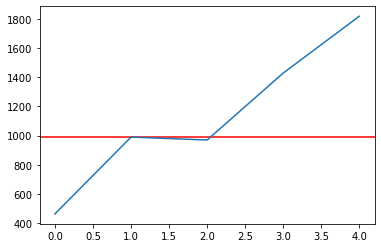

In [266]:
plt.axhline(jnb.inner_breaks_[0], color="red")
plt.plot(sums)

In [100]:
points = sums.tolist()

clusters = []
eps = 200000
points_sorted = sorted(points)
curr_point = points_sorted[0]
curr_cluster = [curr_point]
for point in points_sorted[1:]:
    if point <= curr_point + eps:
        curr_cluster.append(point)
    else:
        clusters.append(curr_cluster)
        curr_cluster = [point]
    curr_point = point
clusters.append(curr_cluster)
len(clusters), clusters

(2,
 [[4619946, 4622351, 4668959],
  [4892004,
   4922739,
   5060573,
   5072280,
   5079287,
   5083942,
   5090388,
   5095935,
   5101711,
   5101919,
   5105543,
   5105897,
   5106147,
   5109603,
   5109926,
   5110000,
   5110000,
   5110000,
   5110001,
   5110001,
   5110002,
   5110003,
   5110003,
   5110005,
   5110006,
   5110006,
   5110006,
   5110008,
   5110010,
   5110010,
   5110011,
   5110012,
   5110012,
   5110012,
   5110014,
   5110014,
   5110015,
   5110015,
   5110016,
   5110016,
   5110016,
   5110016,
   5110017,
   5110017,
   5110017,
   5110018,
   5110018,
   5110018,
   5110018,
   5110020,
   5110020,
   5110022,
   5110022,
   5110023,
   5110023,
   5110026,
   5110027,
   5110028,
   5110029,
   5110029,
   5110031]])

In [82]:
kde = KernelDensity(kernel='exponential', bandwidth=2, leaf_size=2).fit(sums.reshape(-1, 1))
e = kde.score_samples(sums.reshape(-1, 1))

In [83]:
from scipy.signal import argrelextrema
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
a = e
print(a[a < s[mi][0]], a[a >= s[mi][1]])

[-3.22691438 -3.85822644 -3.60916242 -3.21073082 -3.49238605 -3.81813497
 -3.95710274 -3.35286835 -3.87605883 -3.85822644 -3.87605883 -3.69849852
 -3.60916242 -3.29825666 -4.21902807 -3.69849852 -3.21073082 -5.54517744
 -5.54517744 -5.54517744 -5.54517744 -5.54517744 -5.54517744 -4.7317066
 -3.84358974 -3.88355743 -3.29825666 -3.87605883 -3.95710274 -3.81813497
 -3.29825666 -3.88355743 -3.22691438 -4.21511215 -3.75718223 -5.54517744
 -4.24472626 -3.21073082 -3.84358974 -4.21511215 -3.49238605 -3.60916242
 -3.35286835 -4.30095938 -3.87904559 -3.29825666 -3.84358974 -5.54517744
 -3.95790216 -3.83908391 -4.08130449 -3.83908391 -5.54517744 -5.54517744
 -5.54517744 -5.54517744 -3.22691438 -3.21073082 -5.54517744 -5.54517744
 -5.54517744 -5.54517744 -5.54517744 -5.54517744] []


In [244]:
bool(jnb.predict(177)), bool(jnb.predict(51000000))

(False, True)

In [21]:
get_occupied_squares(depth, corners)

[18, 20, 21]

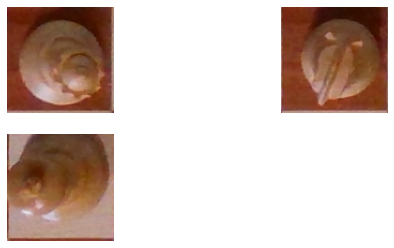

In [22]:
plt.figure(figsize=(9, 9))
for i, square in enumerate(get_occupied_squares(depth, corners)):
    plt.subplot(4, 2, i+1)
    plt.imshow(get_square(square, get_board(color, corners)))
    plt.axis("off")